In [3]:
import numpy as np
import pandas as pd



In [4]:
pd.set_option('display.max_rows',6000)

In [18]:
#nous commençons par définir les variables et les initialiser dans la fonction __init__, à l'intérieur de la classe principale. 
#Les variables définies ci-dessous sont des variables d'état ainsi que des compteurs statistiques.

class waiting_file_Simulation:
    def __init__(self): 
        self.clock=0.0                      #simulation clock
        self.event = ''                     # type d'évènement prochain
        self.num_arrivals_A=0                 #number of arrivals A
        self.num_arrivals_B=0                 #number of arrivals B
        self.t_arrival_A=self.gen_int_arr_A()   #heure de la prochaine arrivée d'un client de cathégorie A
        self.t_arrival_B=self.gen_int_arr_B()   #heure de la prochaine arrivée d'un client de cathégorie B
        self.t_departure1=float('inf')      #heure de départ du serveur E1
        self.t_departure2=float('inf')      #heure de départ du serveur E2
        self.dep_sum1=0                     #Somme des temps de service par guishet 1
        self.dep_sum2=0                     #Somme des temps de service par guishet 2
        self.service_time=0.0               #temps de service d'un client 
        self.state_T1=0                     #état actuel du serveur E1 libre ou occupé (binaire)
        self.state_T2=0                     #état actuel du serveur E2 (binaire)
        self.num_in_q1=0                    #numéro actuel dans la file d'attente de guichet 1
        self.num_in_q2=0                    #numéro actuel dans la file d'attente de guichet 2
        self.num_of_departures1=0           #nombre de clients servis par guishet 1
        self.num_of_departures2=0           #nombre de clients servis par guishet 2
        self.sum_t_in_system_A =0.0              # temps de séjour d'un client de cathégorie A dans le système **
        self.sum_t_in_system_B =0.0 
        self.sum_t_in_system=0.0            # pour calculer le temps moyenne de séjour d'un client
        self.t_in_system = 0.0              # pour calculer le temps de séjour d'un client dans le système
        self.sum_t_in_line1=0.0             #le temps totale d'attente pour la file 1 
        self.sum_t_in_line2=0.0             #le temps totale d'attente pour la file 2
        self.sum_num_A = 0                   # pour calculer nombre moyen des clients dans le system de type A
        self.sum_num_B = 0                   # pour calculer nombre moyen des clients dans le system de type B
        self.num_in_system = 0              # le nombre totale de clients pour l'horizone donné
        
    
    def time_adv(self):                                                       
        t_next_event=min(self.t_arrival_A,self.t_arrival_B,self.t_departure1,self.t_departure2)  
        self.sum_t_in_line2 += (self.num_in_q2*(t_next_event-self.clock))
        self.sum_t_in_line1 += (self.num_in_q1*(t_next_event-self.clock))
        self.sum_num_A += (self.num_arrivals_A*(t_next_event-self.clock))
        self.sum_num_B += (self.num_arrivals_B*(t_next_event-self.clock))
        self.clock=t_next_event
        if (self.t_arrival_A == t_next_event)  or (self.t_arrival_B == t_next_event) :

            if self.t_arrival_A<self.t_arrival_B:
                
                self.num_arrivals_A+=1
                self.event = "Arrivée de client de type A"
                self.arrival()
            else :
                self.event = "Arrivée de client de type B"
                self.num_arrivals_B+=1
                self.arrival()
        elif self.t_departure1==t_next_event:
            self.event = "Départ de guichet 1"
            self.num_arrivals_A -=1
            self.teller1()
            
                
        
        elif self.t_departure2==t_next_event :
            self.event = "Départ de guichet 2"
            self.num_arrivals_B -=1
            self.teller2()      
            
    def arrival(self):
        if self.t_arrival_A < self.t_arrival_B:
            self.num_in_system += 1
           
            if self.num_in_q1 == 0:                                 #schedule next departure or arrival depending on state of servers
                if self.state_T1==1 :
                    self.num_in_q1+=1
                    self.t_arrival_A=self.clock + self.gen_int_arr_A()
                  
                else:
                    self.state_T1=1
                    self.dep1= self.gen_service_time_teller1()
                    self.service_time = self.dep1
                    self.dep_sum1 += self.dep1
                    self.t_departure1=self.clock + self.dep1
                    self.sum_t_in_system +=self.t_departure1 - self.t_arrival_A 
                    self.t_in_system = self.t_departure1 - self.t_arrival_A
                    self.t_arrival_A=self.clock+self.gen_int_arr_A()
            
                        
            else:
                self.num_in_q1+=1
                self.t_arrival_A = self.clock + self.gen_int_arr_A()
        else :
            self.num_in_system += 1
            
            if self.num_in_q2 == 0:                                 #schedule next departure or arrival depending on state of servers
                if self.state_T2==1 :
                    self.num_in_q2+=1
                    self.t_arrival_B=self.clock+self.gen_int_arr_B()
                  
                else:
                    self.state_T2=1
                    self.dep2= self.gen_service_time_teller2()
                    self.dep_sum2 += self.dep2
                    self.service_time = self.dep2
                    self.t_departure2=self.clock + self.dep2
                    self.sum_t_in_system += self.t_departure2 - self.t_arrival_B
                    self.t_in_system = self.t_departure2 - self.t_arrival_B
                    self.t_arrival_B=self.clock+self.gen_int_arr_B()
                    
            else:
                self.num_in_q2+=1
                self.t_arrival_B=self.clock + self.gen_int_arr_B()
        
    def teller1(self):                #departure from server 1
        if self.num_in_q1>0:
            self.dep1= self.gen_service_time_teller1()
            self.dep_sum1 += self.dep1
            self.t_departure1=self.clock + self.dep1
            self.num_in_q1-=1
        else:
            self.t_departure1=float('inf') 
            self.state_T1=0                  
    
    def teller2(self):   #departure from server 2
        if self.num_in_q2>0:
            self.dep2= self.gen_service_time_teller2()
            self.dep_sum2 += self.dep2
            self.t_departure2=self.clock + self.dep2
            self.num_in_q2-=1
        else:
            self.t_departure2=float('inf')
            self.state_T2=0          
     
    def gen_int_arr_A(self):                                             #function to generate arrival times using inverse trnasform method
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1/8)
    
    def gen_int_arr_B(self):                                             #function to generate arrival times using inverse trnasform method
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1/17) 
    
    def gen_service_time_teller1(self):                                #function to generate service time for teller 1 using inverse trnasform
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1/20)
    
    def gen_service_time_teller2(self):                                #function to generate service time for teller 1 using inverse trnasform
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1/30)
    
    
        

In [19]:
s=waiting_file_Simulation()
df=pd.DataFrame(columns=['evenement','temps_arrivée/Départ','num_of_A_in_system','num_of_B_in_system','service_time','temps_sèjour'])
s.__init__()
while s.clock <= 10 : #Horizon de simulation
        s.time_adv()
        a=pd.Series([s.event,s.clock,s.num_arrivals_A,s.num_arrivals_B,s.service_time,s.t_in_system],index=df.columns)
        df=df.append(a,ignore_index=True)

In [20]:
df

,evenement,temps_arrivée/Départ,num_of_A_in_system,num_of_B_in_system,service_time,temps_sèjour
0,Arrivée de client de type B,0.097426,0,1,0.058146,0.058146
1,Arrivée de client de type B,0.116176,0,2,0.058146,0.058146
2,Départ de guichet 2,0.155572,0,1,0.058146,0.058146
3,Départ de guichet 2,0.158835,0,0,0.058146,0.058146
4,Arrivée de client de type B,0.197399,0,1,0.060854,0.060854
5,Arrivée de client de type A,0.246643,1,1,0.005986,0.005986
6,Départ de guichet 1,0.252629,0,1,0.005986,0.005986
7,Départ de guichet 2,0.258253,0,0,0.005986,0.005986
8,Arrivée de client de type B,0.271279,0,1,0.034819,0.034819
9,Départ de guichet 2,0.306098,0,0,0.034819,0.034819


In [22]:
statistics=pd.DataFrame(columns=['nombre_moyen_de_clientA','nombre_moyen_de_clientB','nombre_moyen_en_file1','nombre_moyen_en_file2','temps_sèjour_moyen','Taux_occupation_E1','Taux_occupation_E2'])
a=pd.Series([s.sum_num_A/s.clock,s.sum_num_B/s.clock,s.sum_t_in_line1/s.clock,s.sum_t_in_line2/s.clock,s.sum_t_in_system/s.num_in_system,s.dep_sum1/s.clock,s.dep_sum2/s.clock],index=statistics.columns)
statistics=statistics.append(a,ignore_index=True)

In [23]:
statistics

,nombre_moyen_de_clientA,nombre_moyen_de_clientB,nombre_moyen_en_file1,nombre_moyen_en_file2,temps_sèjour_moyen,Taux_occupation_E1,Taux_occupation_E2
0,0.555557,0.963207,0.167,0.427546,0.019299,0.393332,0.535661


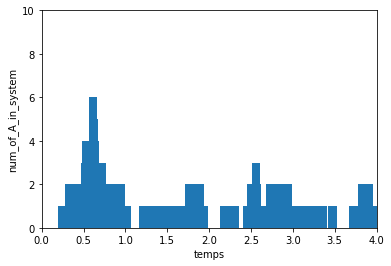

In [36]:
import matplotlib.pyplot as plt
Y = df["num_of_A_in_system"]
X = df["temps_arrivée/Départ"]
plt.bar(X,Y,width = 0.1)
plt.xlabel("temps")
plt.ylabel("num_of_A_in_system")
plt.axis([0, 4, 0, 10])
plt.show()

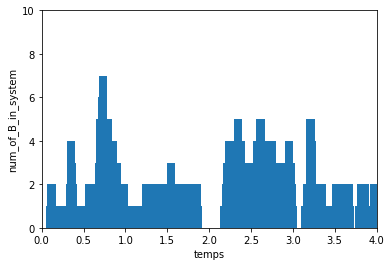

In [37]:
Y = df["num_of_B_in_system"]
X = df["temps_arrivée/Départ"]
plt.bar(X,Y,width = 0.1)
plt.xlabel("temps")
plt.ylabel("num_of_B_in_system")
plt.axis([0, 4, 0, 10])
plt.show()